In [3]:
import numpy as np
import pandas as pd

In [4]:
campaign = pd.read_csv('data.csv')
campaign.head()

,Unnamed: 0,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes,Region_Name_East,Region_Name_South,Region_Name_West,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,0,56,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,1,52,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2,32,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,3,36,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,4,33,93.994,-36.4,4.857,5191.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = campaign['y_yes']
X = campaign.drop(['y_yes'], axis=1)

In [7]:
X.head()

,Unnamed: 0,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Region_Name_East,Region_Name_South,Region_Name_West,job_blue-collar,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,0,56,93.994,-36.4,4.857,5191.0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,1,52,93.994,-36.4,4.857,5191.0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,32,93.994,-36.4,4.857,5191.0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,3,36,93.994,-36.4,4.857,5191.0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,4,33,93.994,-36.4,4.857,5191.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_yes, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
X_train.head()

,Unnamed: 0,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Region_Name_East,Region_Name_South,Region_Name_West,job_blue-collar,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,marital_married,marital_single,default_yes,housing_yes,loan_yes
8709,8709,28,92.893,-46.2,1.291,5099.1,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3173,3173,42,93.369,-34.8,0.652,5008.7,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1
15395,15395,26,92.893,-46.2,1.299,5099.1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
641,641,55,93.918,-42.7,4.955,5228.1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
13313,13313,36,93.994,-36.4,4.857,5191.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
cm = classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4808
           1       0.54      0.14      0.23       683

    accuracy                           0.88      5491
   macro avg       0.71      0.56      0.58      5491
weighted avg       0.85      0.88      0.85      5491



### Support Vector Machine

In [20]:
from sklearn.svm import SVC  

In [21]:
svc = SVC(kernel='poly') 
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [22]:
cm = classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      4808
           1       0.55      0.12      0.20       683

    accuracy                           0.88      5491
   macro avg       0.72      0.55      0.57      5491
weighted avg       0.85      0.88      0.84      5491



In [72]:
from sklearn.model_selection import GridSearchCV

In [85]:
svc = SVC(kernel='poly')
gs = GridSearchCV(svc, param_grid = {'degree':[2, 3, 4]}, scoring='accuracy')
gs.fit(X_train,y_train)
# gs.best_params_

GridSearchCV(estimator=SVC(kernel='poly'), param_grid={'degree': [2]},
             scoring='accuracy')

In [86]:
gs.best_estimator_

SVC(degree=2, kernel='poly')

In [87]:
y_pred = gs.predict(X_test)
cm = classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4808
           1       0.59      0.06      0.11       683

    accuracy                           0.88      5491
   macro avg       0.73      0.53      0.52      5491
weighted avg       0.84      0.88      0.83      5491



### Decision Tree 

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree = DecisionTreeClassifier(max_depth=8, random_state=45)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=45)

In [45]:
from graphviz import Source
from sklearn.tree import export_graphviz

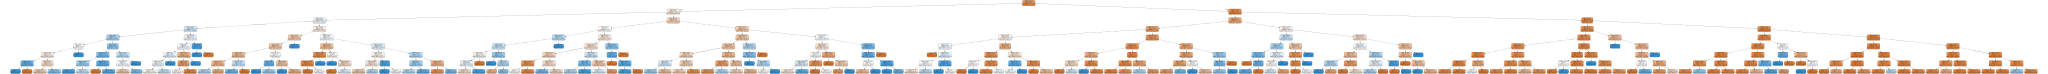

In [46]:
export_graphviz(
    tree,
    out_file="tree.dot",
    filled=True,
    rounded=True,
    proportion=True
)

Source.from_file("tree.dot")

In [47]:
y_pred = tree.predict(X_test)
cm = classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4808
           1       0.47      0.19      0.27       683

    accuracy                           0.87      5491
   macro avg       0.68      0.58      0.60      5491
weighted avg       0.84      0.87      0.85      5491

